# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [2]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
# import graphviz

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


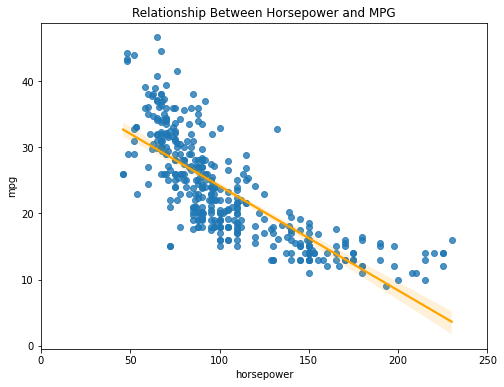

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](img/slope-rss-relationship.png)

In [6]:
# call_on_students(1)
"""
This Line is showing the relationship between slope and the RSS
At around the slope of .-.157 the RSS is lowest
"""

'\nThis Line is showing the relationship between slope and the RSS\nAt around the slope of .-.157 the RSS is lowest\n'

#### Answer: 

- This Line is showing the relationship between slope and the RSS
- At around the slope of .-.157 the RSS is lowest


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)
"""
As point gets closer to the bottom the jump  in the change in slope decreases
"""

'\nAs point gets closer to the bottom the jump  in the change in slope decreases\n'

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)
"""
Step size is the size of the step we take going down the curve to reach the optimal point large steps when farther away
and smaller steps as we get close
"""

'\nStep size is the size of the step we take going down the curve to reach the optimal point large steps when farther away\nand smaller steps as we get close\n'

#### Answer: 

- Step size is the size of the step we take going down the curve to reach the optimal point large steps when farther away and smaller steps as we get close


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- Categorical Data, event, non event, 
- log loss
- f1-score, recall, precision , accuracy
- not continuos, does log odss and doesn't find best fit line
- parametric


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 

- It is faster than Decision Tree
- Does will with categorical data, good for generalization, more predictive power
- not as interpretable
- Lazy learning(no training phase for knn, simple algorithm), easy to visualize


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42

X = mpg_class.drop("target", axis = 1)
y = mpg_class.target

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state = 42, 
                                                   test_size = .33)


In [15]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [18]:
# Code to explore
y_train.value_counts(normalize = True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- Imbalanced data where 74.4% of training data is class zero


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- It predict only class 0


#### Part 3: How accurate would that baseline be on test data?


In [19]:
# Code to find the answer
y_test.value_counts(normalize = True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- 75.3% accurate on test data


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [20]:
# call_on_students(1)

#### Answer:

- Imbalance data set could skew data and cause prediction errors
- Oversampling, SMOTE
- undersampling doesn't make sense here, since our dataset is so small


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [21]:
# call_on_students(1)

In [22]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)

logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

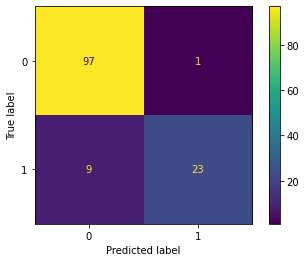

In [23]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [24]:
# call_on_students(1)

In [25]:
y_preds = logreg.predict((X_test_scaled))

In [26]:
# Accuracy
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.9230769230769231

In [27]:
# Precision
precision = precision_score(y_test, y_preds)
precision

0.9583333333333334

In [28]:
# Recall
recall = recall_score(y_test, y_preds)
recall

0.71875

In [29]:
# F1-Score
f1_score = f1_score(y_test, y_preds)
f1_score

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [30]:
# call_on_students(1)

In [31]:
# Calculate roc-auc
y_prob = logreg.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, y_prob)

0.9811862244897959

In [45]:
X_test_scaled[:,1]

array([-0.98222121, -0.743818  , -1.02990185, -1.02990185, -0.56263157,
       -0.97268508,  1.91676177, -0.97268508,  0.24793933, -1.2492328 ,
        1.82140049, -0.41005351,  1.43995536, -0.97268508, -0.34330062,
       -0.82964316, -0.00953613, -0.86778767, -0.743818  , -0.73428187,
       -0.00953613, -0.97268508, -1.02990185,  1.02990185, -1.14433539,
       -0.96314895, -0.75335413,  0.24793933, -0.97268508, -0.743818  ,
        1.43995536,  0.31469223,  0.64845672, -0.75335413,  1.91676177,
       -1.02990185,  0.98222121, -0.96791702,  0.98222121,  1.53531665,
        1.02990185, -1.03943798, -0.89639605, -0.97268508,  1.44949149,
        2.2982069 ,  0.48634254, -1.02990185, -0.56263157, -1.03943798,
        1.44949149, -0.82010703, -0.56263157, -0.75335413,  0.31469223,
        0.56263157,  0.60077608,  0.31469223, -0.90593218, -0.82010703,
        2.44124883,  0.31469223, -0.24793933, -0.75335413, -0.61984834,
       -0.79149864, -0.56263157, -1.03943798,  0.58170382,  2.19

In [47]:
X_test_scaled

array([[-0.88631438, -0.98222121, -0.96077631, -0.96612552,  0.88504267,
        -1.15108625,  0.54542507],
       [-0.88631438, -0.743818  ,  0.23505929, -0.24973099,  0.08087091,
         0.5120641 ,  0.54542507],
       [-0.88631438, -1.02990185, -1.19474415, -1.42598933,  0.32561883,
         0.5120641 ,  1.77733341],
       [-0.88631438, -1.02990185, -0.93477988, -1.24275311,  1.7591424 ,
        -1.42827797, -0.68648327],
       [-0.88631438, -0.56263157, -0.51883707, -0.25564183,  0.04590692,
         1.620831  , -0.68648327],
       [-0.88631438, -0.97268508, -0.80479775, -1.00631927,  0.32561883,
        -0.04231935,  1.77733341],
       [ 1.42427634,  1.91676177,  1.66486272,  2.05668111, -1.21279671,
        -1.42827797, -0.68648327],
       [-0.88631438, -0.97268508, -0.80479775, -0.87628066,  0.95497065,
         0.23487238,  1.77733341],
       [ 0.26898098,  0.24793933, -0.28486923,  0.30470637,  0.18576288,
        -0.31951107, -0.68648327],
       [-0.88631438, -1.2492

In [46]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
78,4,96.0,69,2189,18.0,72,2
274,4,121.0,115,2795,15.7,78,2
246,4,91.0,60,1800,16.4,78,3
55,4,91.0,70,1955,20.5,71,1
387,4,140.0,86,2790,15.6,82,1
...,...,...,...,...,...,...,...
232,4,151.0,88,2740,16.0,77,1
193,4,85.0,52,2035,22.2,76,1
238,4,97.0,78,2190,14.1,77,2
152,6,250.0,72,3432,21.0,75,1


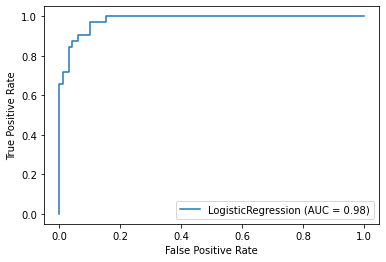

In [32]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [33]:
# call_on_students(1)

#### Answer:

- Our model is doing great minimum FP and FN, and precision and accuracy in the 90s and recall in the 70s


## Part 4: Decision Trees

### Set Up


In [34]:
# Helper function from a colleague (h/t Bryan)
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [35]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [36]:
# conda install python-graphviz

In [37]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

NameError: name 'graphviz' is not defined

In [38]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

NameError: name 'graphviz' is not defined

#### Images:

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](img/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](img/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [39]:
# call_on_students(1)

#### Answer:

- Version 1 because the distinct evens are separated better


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [40]:
# call_on_students(1)

In [41]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state = 42)

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

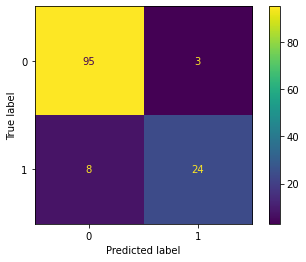

In [42]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_scaled, y_test)
plt.show()

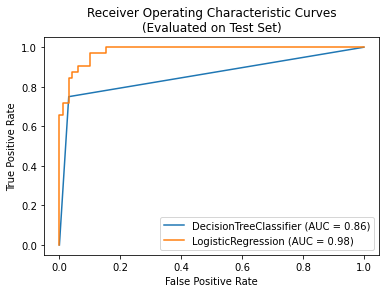

In [43]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [44]:
# call_on_students(1)

#### Answer:

- The Logistic Regression model is better because it has and haigher score and more area under the curve
